# **Lineal Regression**

## **Closed-form**: 
Aaplicando la formula matemática en el entrenamiento para obtener directamente la solucion. Es llamada 
*Normal Equation*: 
θ = ($X^T$ * X $)^{−1}$ * X * Y

 Where: 
* *θ* is the value that minimizes the cost function.
* *Y* is the vector of target values 
* *X* is the matrix of characteristics
 
Esta fórmula puede fallar si la matriz X es singular(no invertible) y 
>entonces se usa otra tecnica que se basa en la descomposicion de los vectores propios de la matriz
 
Vamos a prbar la fórmula con un ejemplo ficticio 

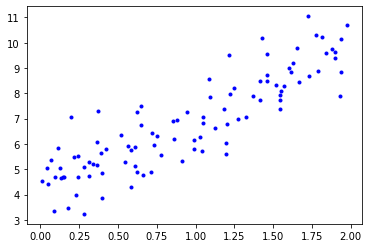

In [11]:
import numpy as np
import matplotlib.pyplot as plt
 
np.random.seed(42)


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X,y, 'b.')


In [12]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_



(array([4.21509616]), array([[2.77011339]]))

Habríamos esperado $x_0$ = 4 y $x_1$ = 3 en vez de $x_0$ = 4,215 y $x_1$ = 2,770. Se
acerca bastante, pero el ruido hace imposible recuperar los parámetros
exactos de la función original.

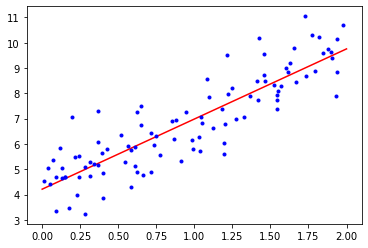

In [14]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

## **Linear Regression with Gradient Descent**

### **Implementacion de Batch Gradient Descent** 
El principal problema del Descenso Gradiente por Lotes es que utiliza todo el
conjunto de entrenamiento para calcular los gradientes en cada paso, lo que lo
hace muy lento cuando el conjunto de entrenamiento es grande y ademas que puede quedar atrapado fácilmente en un mínimo local 

In [15]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta_path_bgd = []


# random initialization
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    # calcualar el gradiente
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)

    # calcular el valor de la solucion para la siguiente iteracion
    theta = theta - eta * gradients

    theta_path_bgd.append(theta)


theta


array([[4.21509616],
       [2.77011339]])

### **Implementacion de Stochastic Gradient Descent**
Elige una instancia aleatoria del conjunto de entrenamiento en cada paso y calcula los gradientes basándose
sólo en esa única instancia. Obviamente, trabajar con un único caso cada vez
hace que el algoritmo sea mucho más rápido porque tiene muy pocos datos
que manipular en cada iteración lo que permite entrenar conjuntos de
entrenamiento enormes. 
 
En lugar de disminuir suavemente hasta alcanzar el mínimo, la función de coste
rebotará hacia arriba y hacia abajo, disminuyendo sólo en promedio, pero la ventaja  es q puede ayudar al algoritmo a salir de los mínimos locales. Una solución a este dilema(rebote) es reducir gradualmente el ritmo de aprendizaje



In [16]:
n_epochs = 50
m = 100 # tamaño de los datos 
theta_path_sgd = []

# t0, t1 = 5, 50 # learning schedule hyperparameters

# Funcion simple para reducir el ritmo de aprendizaje
def learning_schedule(t,t0= 5, t1=50):
    return t0 / (t + t1)


# random initialization
theta = np.random.randn(2,1) 
    
for epoch in range(n_epochs):
    for i in range(m):
        # valor aleatorio 
        random_index = np.random.randint(m)

        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # obter el gradiente para esa muestra
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

        theta_path_sgd.append(theta)


theta

array([[4.18475289],
       [2.73036719]])

### **Implementacion de Mini-batch Gradient Descent**
Utiliza una muestra en cada iteracion para calcualr el gradiente

In [17]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):

    # barajar los indices
    shuffled_indices = np.random.permutation(m)

    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]

        # calcular el gradiente
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)

        # calcualar el grado de aprendizaje
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

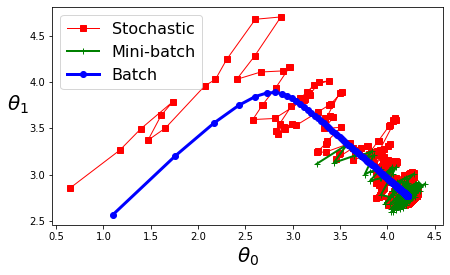

In [18]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)

plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.show()

